# **Optimizing Ad Campaign on Social Media**

## **Project Introduction:**
#### I  Running ad campaigns on social media such as Facebook (which includes Instagram, Mesenger, and Audience Network) is a popular strategy for business of all sizes due to several compelling reasons:
  * Massive audience reach
  * Unparalleled targeting capabilities
  * Visual and engaging ad formats
  * Cost-effectiveness
  * Robust analytics and tracking
  * Full-funnel marketing
  * Integration with business tools
#### II  By analyzing historical ad campaign data on social media, XYZ Company can gain critical insights to optimize digital marketing strategies such as budget allocation, refine audience and segmentation. 
#### III Project goal: using data-driven decisions to increase sales and Return on Investment (ROI).

## **About Data:**
Data source: https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking

* The data used in this project is from an anonymous organisation’s social media ad campaign using Google Adwords to track Conversions.
* Column explanation:

    1.) ad_id: an unique ID for each ad.

    2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

    3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

    4.) age: age of the person to whom the ad is shown.

    5.) gender: gender of the person to whom the ad is shown.

    6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

    7.) Impressions: the number of times the ad was shown.

    8.) Clicks: number of clicks on for that ad.

    9.) Spent: amount of money paid by xyz company to social media company such as Facebook, to show ad.

    10.) Total conversion: total number of people who enquired about the product after seeing the ad.

    11.) Approved conversion: total number of people who bought the product after seeing the ad.


## **Project Objectives:**

* Data Preparation: load python libraries, load data,data cleansing and explore.

* Exploratory Data Analysis (EDA):

    * Determine significant relationships between the target variable (Approved Conversion/Actual Purchase) and explanatory features.

    * Characterize behavioral patterns and their influence on the target by age, gender, and interest group segments.
* Data Preprocessing: encoding labels(categorical data), feature scaling(numerical data),  data spliting.
* Modeling & Model Evaluation: apply regression algorithms to construct a predictive model for Approved Conversion.

* Conclusion & Recommendations: summarize findings and provide recommendation for fix or improvement.


## Data Preparation:

In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [53]:
# load the data set and check basic information.
df = pd.read_csv('KAG_conversion_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


The data set has total 1143 observations and 11 columns, there is no null value.

In [55]:
# statistical info
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


#### Data preparation for visualization:

In [57]:
# drop unwanted columns
df = df.drop(columns=['fb_campaign_id','ad_id'],axis=1)

In [58]:
df['xyz_campaign_id'].unique()


array([ 916,  936, 1178])

In [59]:
# rename campaign id for data visualization

campdict={916:'Campaign_I', 936: 'Campaign_II', 1178: 'Campaign_III'}
df['xyz_campaign_id'] = df['xyz_campaign_id'].map(campdict)

In [60]:
df.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,Campaign_I,30-34,M,15,7350,1,1.43,2,1
1,Campaign_I,30-34,M,16,17861,2,1.82,2,0
2,Campaign_I,30-34,M,20,693,0,0.00,1,0
3,Campaign_I,30-34,M,28,4259,1,1.25,1,0
4,Campaign_I,30-34,M,28,4133,1,1.29,1,1


## EDA:

<Axes: >

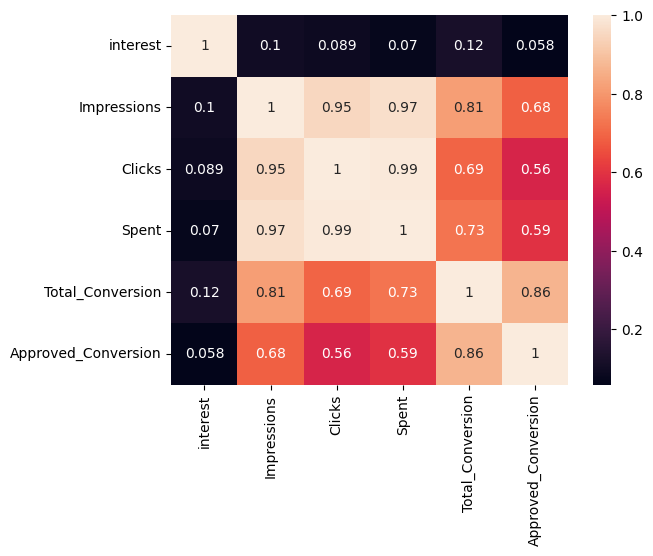

In [62]:
# Discover correlation between age, gender, interest, Impression, Clicks, Spent with Approved_Conversion (actual purchase)
sns.heatmap(df[['interest','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion']].corr(),annot=True)


#### **Findings:**
##### I Approved_Conversion (actual purchases) is strongly correlated with Total_Conversion (enquiries), indicating that a high number of enquiries often leads to more purchases. Other features that show notable — but comparatively weaker — correlations with Approved_Conversion, in descending order, are -- Impressions, Spent, Clicks.
##### II This suggests that while visibility (Impressions) and investment (Spent) contribute to conversions, user engagement through enquiries (Total_Conversion) is the most critical driver of actual purchases.

### Campaigns

In [65]:
df.Approved_Conversion.value_counts()

Approved_Conversion
0     559
1     403
2      86
3      35
4      24
5       7
6       7
8       5
10      4
7       4
9       3
14      2
17      1
21      1
12      1
13      1
Name: count, dtype: int64

The conversion rate from ad campaign engagement to actual purchase stands at approximately 51%.

In [67]:
# find out ad spent for each campaign
camp_s = df.groupby('xyz_campaign_id').agg({'Spent':'sum', 'Approved_Conversion':'sum'}).reset_index()
camp_s


,xyz_campaign_id,Spent,Approved_Conversion
0,Campaign_I,149.710001,24
1,Campaign_II,2893.369999,183
2,Campaign_III,55662.149959,872


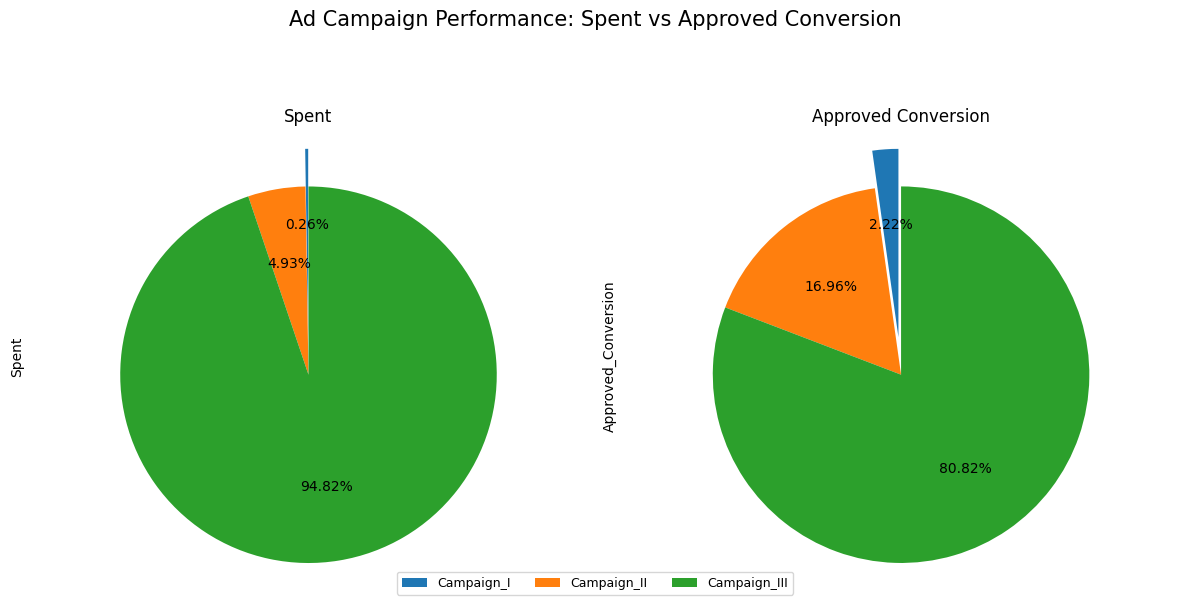

In [68]:

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Labels and explode settings
labels = camp_s.xyz_campaign_id.unique().tolist()
explode_list = [0.2, 0, 0]

# First pie chart: Spent
camp_s['Spent'].plot(kind='pie',
                     autopct='%1.2f%%',
                     startangle=90,
                     labels=None,
                     explode=explode_list,
                     shadow=False,
                     ax=axes[0])
axes[0].axis('equal')
axes[0].set_title('Spent')

# Second pie chart: Approved Conversion
camp_s['Approved_Conversion'].plot(kind='pie',
                                   autopct='%1.2f%%',
                                   startangle=90,
                                   labels=None,
                                   explode=explode_list,
                                   shadow=False,
                                   ax=axes[1])
axes[1].axis('equal')
axes[1].set_title('Approved Conversion')

# Add single legend
fig.legend(labels=labels, loc='lower center', ncol=3, fontsize=9)

# Shared overall title
fig.suptitle('Ad Campaign Performance: Spent vs Approved Conversion', fontsize=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])  # leave space for suptitle and legend
plt.show()


#### **Findings**: 
##### I Ad Spent(investment) has positive impact on conversion rate. 
##### II However, campaign_I has the greatest conversion per a dollar spending ratio (Approved Conversion% / Spent% = 8.54), compared to that from campaign_II (3.44) and campaign_III (0.85), which means optimizing resource allocation by increasing investment in Campaign_I is projected to lead to a substantial uplift in approved conversions.

### Age

In [71]:
age = df.groupby('age').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum',
    'Spent': 'sum'
}).reset_index()
age

,age,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent
0,30-34,67993019,9483,1431,494,15252.399986
1,35-39,42104644,7094,626,207,11112.429994
2,40-44,39604307,7736,523,170,11589.729981
3,45-49,63732858,13852,684,208,20750.669997


Text(0, 0.5, 'Ads Count')

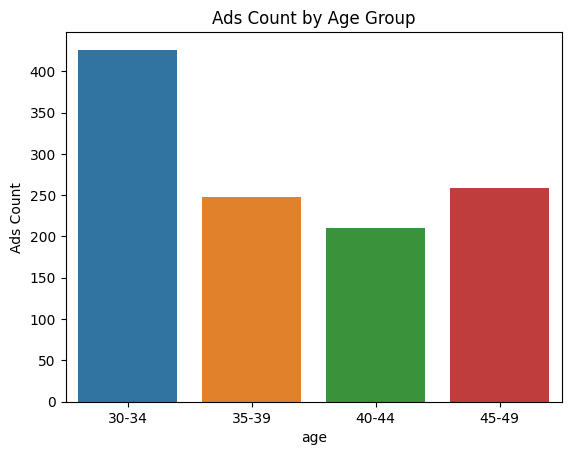

In [72]:
sns.countplot(data=df, x='age', hue='age')
plt.title('Ads Count by Age Group')
plt.ylabel('Ads Count')

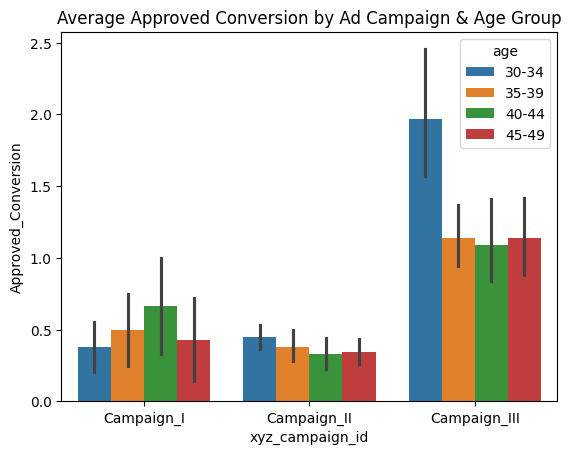

In [73]:
sns.barplot(data=df, x='xyz_campaign_id', y='Approved_Conversion', hue='age')
plt.title('Average Approved Conversion by Ad Campaign & Age Group')
plt.show()

#### **Findings**: 
##### I The [30-34] age group represents our largest purchasing segment and warrants increased strategic focus.
##### II Despite receiving the highest ad expenditure, the [45-49] age group demonstrated poor performance, indicating a need to reduce investment in this segment.

### Gender

In [76]:
gender = df.groupby('gender').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Total_Conversion': 'sum',
    'Approved_Conversion': 'sum',
    'Spent': 'sum',

}).reset_index()
gender

,gender,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent
0,F,114862847,23878,1644,495,34502.619963
1,M,98571981,14287,1620,584,24202.609995


In [77]:
df.gender.value_counts()

gender
M    592
F    551
Name: count, dtype: int64

Text(0, 0.5, 'Ads Count')

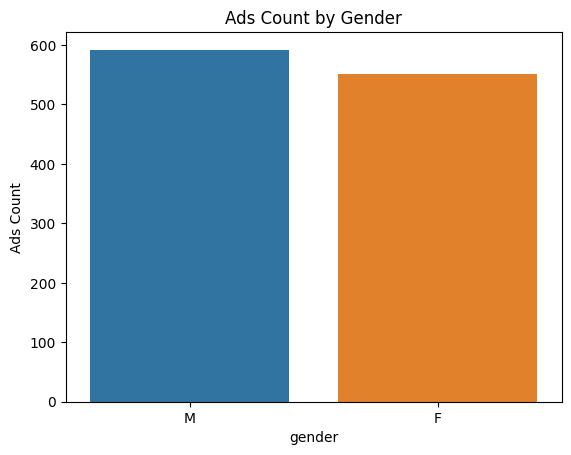

In [78]:
sns.countplot(data=df, x='gender',hue='gender')
plt.title('Ads Count by Gender')
plt.ylabel('Ads Count')

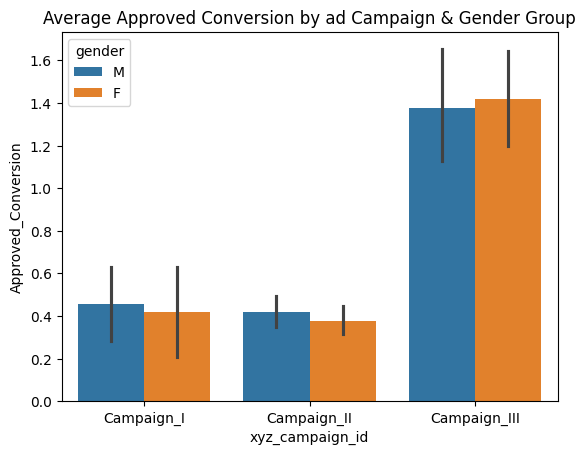

In [79]:
sns.barplot(data=df, x='xyz_campaign_id', y='Approved_Conversion', hue='gender')
plt.title('Average Approved Conversion by ad Campaign & Gender Group')
plt.show()

#### **Findings**: 

##### I Ad campaigns have historically focused more on female users, as indicated by higher Impressions and Spent on female.

##### II While female users show higher engagement (more Clicks) than male, they result in lower conversion efficiency.

##### III To improve performance, future campaigns should consider shifting more focus toward male users, who may yield better conversion outcomes despite lower initial engagement.

##### IV Comparing ad campaigns, campaign_I & II result in slightly better performance toward male than female, campaign_III results in slightly better performance towards female than male users.

#### Total Conversion

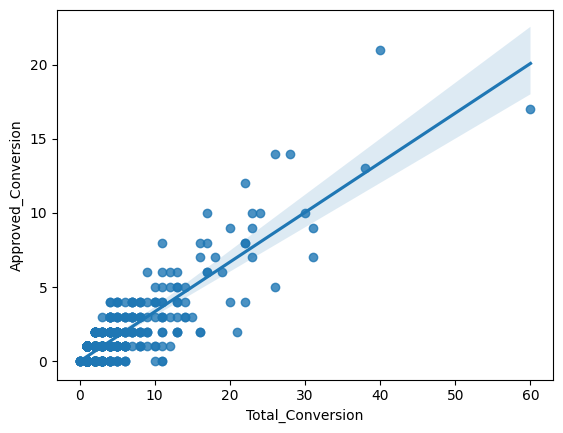

In [82]:
# create regression plot 
sns.regplot(data=df, x='Total_Conversion', y='Approved_Conversion')
plt.show()

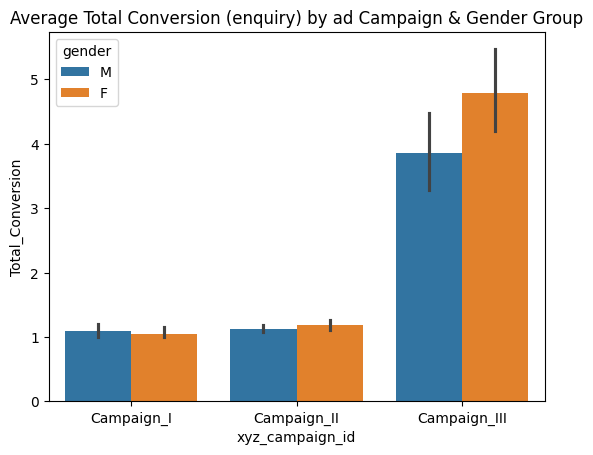

In [83]:
sns.barplot(data=df, x='xyz_campaign_id', y='Total_Conversion', hue='gender')
plt.title('Average Total Conversion (enquiry) by ad Campaign & Gender Group')
plt.show()

#### **Findings:**
##### I The regression plot confirms a strong positive correlation between Approved Conversion (actual purchases) and Total Conversion (enquiries), indicating that higher enquiry volumes are closely associated with more confirmed conversions.

##### II In terms of campaign and gender impact:

Campaign I and Campaign II show no significant difference in performance between male and female users.

However, Campaign III displays a notable gender difference, with female engagement surpassing male engagement, suggesting that this campaign resonated more strongly with female users.

##### III These insights highlight the potential for targeted optimization by aligning campaigns with audience segments that demonstrate higher engagement and conversion rates.

### Impressions

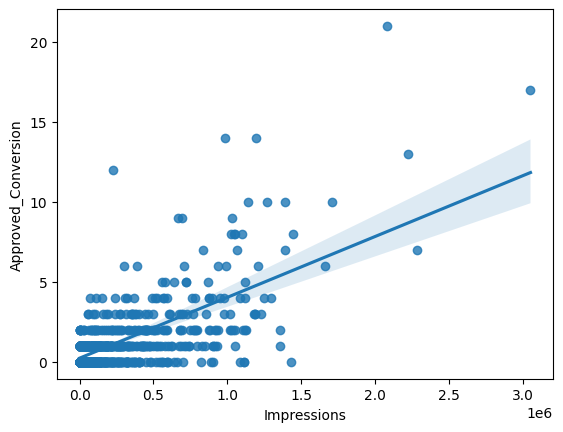

In [86]:
# create regression plot 
sns.regplot(data=df, x='Impressions', y='Approved_Conversion')
plt.show()

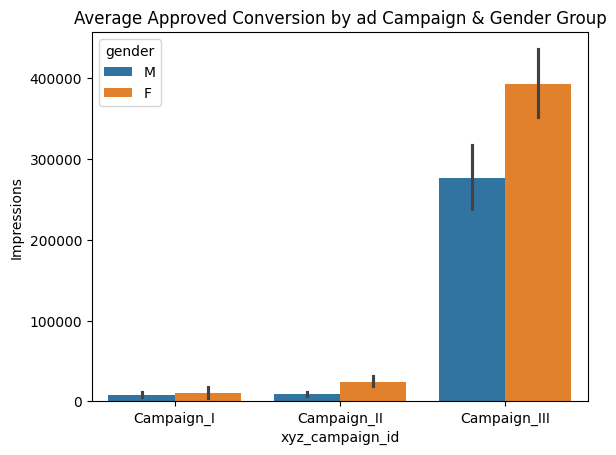

In [87]:
sns.barplot(data=df, x='xyz_campaign_id', y='Impressions', hue='gender')
plt.title('Average Approved Conversion by ad Campaign & Gender Group')
plt.show()

#### **Findings:** 
##### I The regression plot aligns with the correlation heatmap indicating an positive correlation between Impressions and Approved Conversion, suggesting that greater ad visibility tends to drive more conversions.
##### II Across all campaigns, ads were generally targeted more toward female users, with Campaign_III showing the most pronounced gender imbalance, favoring female engagement.

### Interest

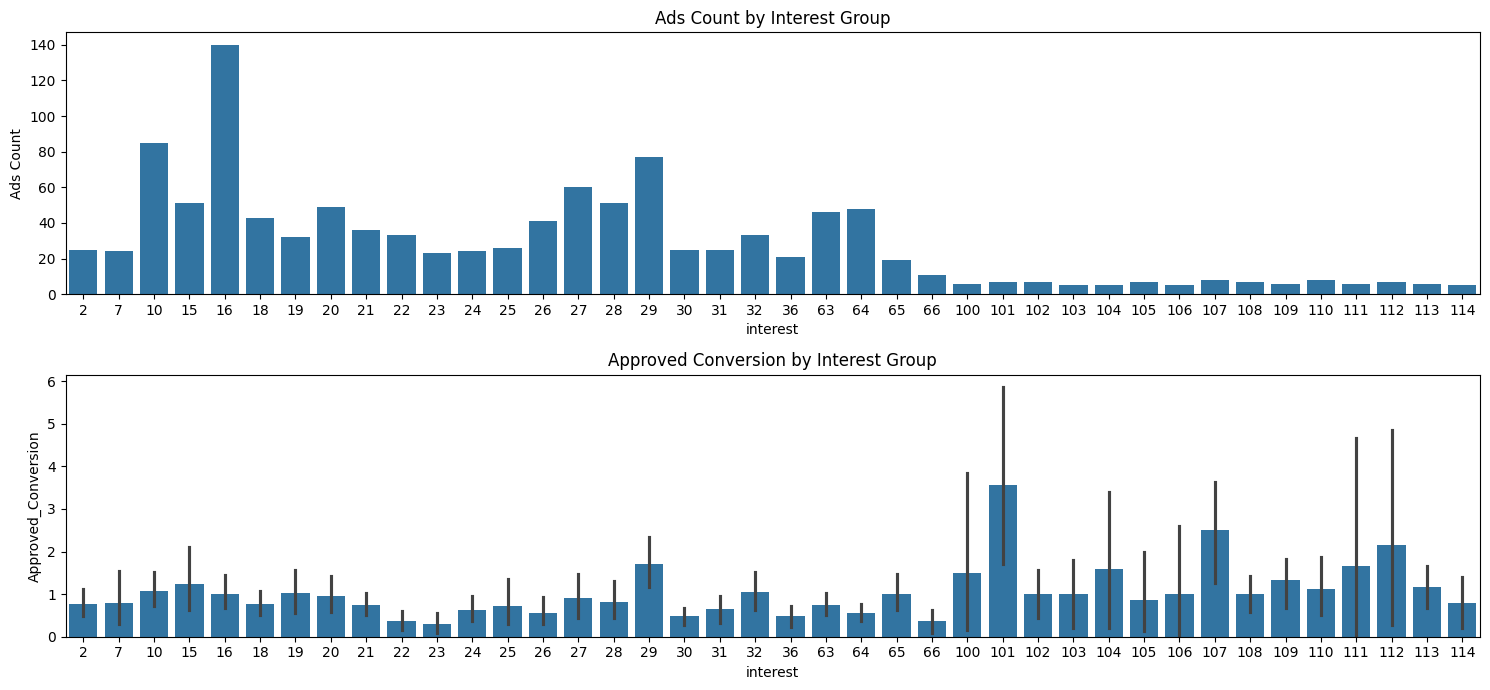

In [90]:
plt.figure(figsize=(15,7))
plt.subplot(211)
sns.countplot(x='interest',data=df)
plt.ylabel('Ads Count')
plt.title('Ads Count by Interest Group')

# black line represent the 95% confidence interval(ci)
# mean(bar height): the height of the bar shows avg value of y for certain group
# confidence interval(error bar): the error bar indicates a range of values within true population mean lies.

plt.subplot(212)
#sns.barplot(data=df, x='interest',y='Approved_Conversion', errorbar=('ci',True))
sns.barplot(data=df, x='interest',y='Approved_Conversion')
plt.title('Approved Conversion by Interest Group')
#sns.barplot(data=df, x='interest',y='Approved_Conversion', errorbar='sd')
plt.tight_layout()
plt.show()



#### **Findings:**

##### I According to the correlation heatmap, interest shows the weakest correlation with Approved Conversion, suggesting it may have limited influence overall. However, the bar plot reveals more nuanced insights:  
Interest group 16 has the highest count number resulted in much fewer approved conversions.
    
In contrast, interest group 101 achieved the highest average of approved conversion despite a significantly fewer ad counts.
##### II This indicates that aligning ads with the most responsive interest groups — like groups 101, 107, 112 and 29 — could significantly improve campaign effectiveness. Relocating ad spend toward high-performing interest segments may yield better conversion rates.

## Data Preprocessing:

In [119]:
# change value of campaing id to original id number
rev_camp = {'Campaign_I': 916,'Campaign_II': 936, 'Campaign_III': 1178}
df['xyz_campaign_id'] = df['xyz_campaign_id'].map(rev_camp)


In [121]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()
# Apply to 'gender' column
df['gender'] = le.fit_transform(df['gender'])
# Apply to 'age' column (if it's categorical; otherwise this might not be appropriate)
df['age'] = le.fit_transform(df['age'])


In [123]:
df.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,NaN,0,1,15,7350,1,1.43,2,1
1,NaN,0,1,16,17861,2,1.82,2,0
2,NaN,0,1,20,693,0,0.00,1,0
3,NaN,0,1,28,4259,1,1.25,1,0
4,NaN,0,1,28,4133,1,1.29,1,1


In [125]:
# pick the most correlated features for modeling and drop the rest.
X = np.array(df.drop(labels=['Approved_Conversion','interest','xyz_campaign_id'],axis=1))
# define target variable
y = np.array(df['Approved_Conversion'])




In [136]:
# feature scalling 
scale = StandardScaler()
X = scale.fit_transform(X)



In [138]:
# splitting data into train and test dataset(total conversion)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling & Model Evaluation:

#### Random Forest Regressor

In [142]:
# define 
rfr = RandomForestRegressor(n_estimators=20, random_state= 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [144]:
# prediting Approved Conversion in test set
y_pred = rfr.predict(X_test)



#### Model evaluation:

In [147]:
# model evaluation using r2 score, mse and mae
r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [149]:

print(f'Model evaluation results for Approved Conversion are: R Squared: {r2_score}, Mean Squred Error: {mse}, Mean Absolute Error: {mae}')



Model evaluation results for Approved Conversion are: R Squared: 0.578118560934648, Mean Squred Error: 1.3849096312469675, Mean Absolute Error: 0.722707423580786


## Conclusion & Recommendations: 


#### 1. Campaign Performance & Potential

    i)  While Campaign_III (ID: 1178) exhibits the highest approved conversion rate, Campaign_I (ID: 916) demonstrates superior conversion efficiency per a dollar spent. 
    ii) Recommendation: a strategic relocation of investment towards Campaign_I holds substantial potential for increasing overall conversions with less spending.

#### 2. Age Group Insights

    i) The [30-34] age group represents our largest purchasing segment and warrants increased strategic focus. The [45-49] age group demonstrated poor performance despite receiving higher expenditure, 
    ii) Recommendation: reduce investment(Impressions) towards age group [45-49].

#### 3. Gender-Based Conversion Efficiency

    i)  Despite higher engagement from female audiences, their conversion efficiency is lower compared to males. 
    ii) Recommendation: Adjusting ad targeting to either prioritize male audiences or achieve a more balanced focus between genders could improve overall conversion rates.

#### 4. User Engagement & ad Visibility Impact
    i)  User engagement through enquiries (Total_Conversion) is the most critical driver of actual purchases.
    ii) Increased ad visibility consistently correlates with higher conversion rates.

#### 5. Interest Group Optimization

    i)  Certain interest groups demonstrated superior performance despite low spent investment.
    ii) Recommendation: strategically reallocating ad spending towards high-performing interest segments is projected to yield improved conversion rates.

#### 6. Model Performance

The Random Forest Regression model, developed to predict Approved Conversion, achieved an R-squared score of 0.578. This indicates that the model can explain 57.8% of the variance in predicting the target variable.